## First attempt at making a neural network for IceTop muons

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

C:\Users\jfcre\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(11)

In [3]:
# Columns: E_proton, E_iron, Zen, coredist, Q300, MuonPE300, nMuon300, Type
# Note that right now, nMuon300 is useless
data = np.load('./data/NN_data_300m.npy')

In [4]:
# convert the python 2 bytes into python 3 format
data_ = []
for i in range(len(data)):
    data_.append([])
    for j in range(0,7):
        data_[i].append(float(data[i,j]))
data = np.array(data_)

In [5]:
# look at data logE in (16.0,16.5) and cos(zenith) > 0.9
data_ = []
for shower in data:
    E_proton = shower[0]
    E_iron = shower[1]
    E_avg = np.sqrt(E_proton*E_iron) # geometric mean
    logE = np.log10(E_avg)
    zen = shower[2]
    if logE >= 16 and logE <= 16.5 and np.cos(zen) > 0.9:
        data_.append(shower)
data_ = np.array(data_)

In [6]:
print(len(data_))

1462


In [7]:
# remove the core distance
data_ = np.delete(data_,3,axis=1)

In [8]:
# split into input and target
X = data_[:,0:4]
Y = data_[:,4]

In [9]:
# split the data into test and training set
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [10]:
# normalize the data because the network will be sensitive
# to relative magnitudes
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# apply the scaler to the sets
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

In [12]:
# create model
model1 = Sequential()
model1.add(Dense(4,input_dim=4,activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(1,activation=None))

In [13]:
# compile model
# loss function: mean square log error
# metric: mean absolute percentage error
model1.compile(loss='msle',optimizer='adam',metrics=['mape','mse'])

In [15]:
# fit the model to the data
history1 = model1.fit(x_train,y_train,epochs=250,batch_size=10)

Epoch 1/250
1096/1096 [==============================] - 1s 474us/step - loss: 60.4043 - mean_absolute_percentage_error: 99.9808 - mean_squared_error: 18580259.9891
Epoch 2/250
1096/1096 [==============================] - 0s 204us/step - loss: 54.2766 - mean_absolute_percentage_error: 99.9456 - mean_squared_error: 18574764.7226
Epoch 3/250
1096/1096 [==============================] - 0s 187us/step - loss: 48.1469 - mean_absolute_percentage_error: 99.8841 - mean_squared_error: 18566156.3047
Epoch 4/250
1096/1096 [==============================] - 0s 179us/step - loss: 43.0823 - mean_absolute_percentage_error: 99.8040 - mean_squared_error: 18554771.2993
Epoch 5/250
1096/1096 [==============================] - 0s 182us/step - loss: 38.4068 - mean_absolute_percentage_error: 99.7022 - mean_squared_error: 18538008.2391
Epoch 6/250
1096/1096 [==============================] - 0s 181us/step - loss: 34.4070 - mean_absolute_percentage_error: 99.5802 - mean_squared_error: 18516501.1150
Epoch 7/25

1096/1096 [==============================] - 0s 174us/step - loss: 3.4962 - mean_absolute_percentage_error: 79.9051 - mean_squared_error: 14340503.0557
Epoch 51/250
1096/1096 [==============================] - 0s 190us/step - loss: 3.3386 - mean_absolute_percentage_error: 79.1330 - mean_squared_error: 14162343.0347
Epoch 52/250
1096/1096 [==============================] - 0s 198us/step - loss: 3.1873 - mean_absolute_percentage_error: 78.3369 - mean_squared_error: 13977372.1387
Epoch 53/250
1096/1096 [==============================] - 0s 185us/step - loss: 3.0421 - mean_absolute_percentage_error: 77.5341 - mean_squared_error: 13788785.1624
Epoch 54/250
1096/1096 [==============================] - 0s 189us/step - loss: 2.9028 - mean_absolute_percentage_error: 76.6832 - mean_squared_error: 13597460.3978
Epoch 55/250
1096/1096 [==============================] - 0s 200us/step - loss: 2.7690 - mean_absolute_percentage_error: 75.8995 - mean_squared_error: 13400153.0538
Epoch 56/250
1096/1096 

1096/1096 [==============================] - 0s 179us/step - loss: 0.2792 - mean_absolute_percentage_error: 40.9569 - mean_squared_error: 3540427.4015
Epoch 100/250
1096/1096 [==============================] - 0s 178us/step - loss: 0.2670 - mean_absolute_percentage_error: 40.3646 - mean_squared_error: 3384553.1419
Epoch 101/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.2558 - mean_absolute_percentage_error: 39.7925 - mean_squared_error: 3236433.0082
Epoch 102/250
1096/1096 [==============================] - 0s 186us/step - loss: 0.2453 - mean_absolute_percentage_error: 39.2405 - mean_squared_error: 3096545.2968
Epoch 103/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.2357 - mean_absolute_percentage_error: 38.7248 - mean_squared_error: 2964453.4269
Epoch 104/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.2267 - mean_absolute_percentage_error: 38.1650 - mean_squared_error: 2839454.0675
Epoch 105/250
1096/1096 

1096/1096 [==============================] - 0s 183us/step - loss: 0.1219 - mean_absolute_percentage_error: 29.4469 - mean_squared_error: 1499874.5874
Epoch 149/250
1096/1096 [==============================] - 0s 175us/step - loss: 0.1212 - mean_absolute_percentage_error: 29.3603 - mean_squared_error: 1494398.0604
Epoch 150/250
1096/1096 [==============================] - 0s 183us/step - loss: 0.1206 - mean_absolute_percentage_error: 29.2113 - mean_squared_error: 1491447.6687
Epoch 151/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.1200 - mean_absolute_percentage_error: 29.1475 - mean_squared_error: 1486650.9715
Epoch 152/250
1096/1096 [==============================] - 0s 179us/step - loss: 0.1194 - mean_absolute_percentage_error: 29.0679 - mean_squared_error: 1481661.8972
Epoch 153/250
1096/1096 [==============================] - 0s 179us/step - loss: 0.1189 - mean_absolute_percentage_error: 28.9967 - mean_squared_error: 1476836.8991
Epoch 154/250
1096/1096 

1096/1096 [==============================] - 0s 177us/step - loss: 0.1071 - mean_absolute_percentage_error: 26.9491 - mean_squared_error: 1412621.7002
Epoch 198/250
1096/1096 [==============================] - 0s 180us/step - loss: 0.1070 - mean_absolute_percentage_error: 26.9179 - mean_squared_error: 1412193.2362
Epoch 199/250
1096/1096 [==============================] - 0s 178us/step - loss: 0.1069 - mean_absolute_percentage_error: 26.9089 - mean_squared_error: 1412481.7164
Epoch 200/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.1068 - mean_absolute_percentage_error: 26.9247 - mean_squared_error: 1411326.8901
Epoch 201/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.1067 - mean_absolute_percentage_error: 26.8549 - mean_squared_error: 1412380.6516
Epoch 202/250
1096/1096 [==============================] - 0s 176us/step - loss: 0.1066 - mean_absolute_percentage_error: 26.8336 - mean_squared_error: 1412470.2258
Epoch 203/250
1096/1096 

1096/1096 [==============================] - 0s 179us/step - loss: 0.1041 - mean_absolute_percentage_error: 26.4247 - mean_squared_error: 1413109.1607
Epoch 247/250
1096/1096 [==============================] - 0s 177us/step - loss: 0.1041 - mean_absolute_percentage_error: 26.3878 - mean_squared_error: 1413478.9015
Epoch 248/250
1096/1096 [==============================] - 0s 179us/step - loss: 0.1041 - mean_absolute_percentage_error: 26.4623 - mean_squared_error: 1409910.1808
Epoch 249/250
1096/1096 [==============================] - 0s 178us/step - loss: 0.1040 - mean_absolute_percentage_error: 26.4577 - mean_squared_error: 1409350.2127
Epoch 250/250
1096/1096 [==============================] - 0s 175us/step - loss: 0.1040 - mean_absolute_percentage_error: 26.3920 - mean_squared_error: 1412288.6931


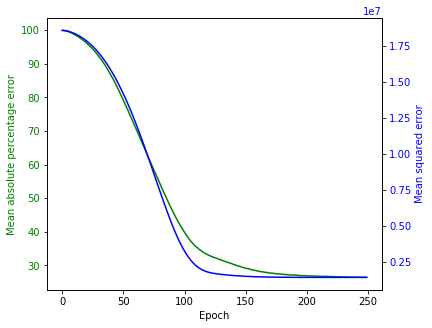

In [16]:
# plot the metrics vs epoch number

fig1,ax1 = plt.subplots(1,1,figsize=(6,5))
ax1.plot(history1.history['mean_absolute_percentage_error'],color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mean absolute percentage error',color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax1_ = ax1.twinx()
ax1_.plot(history1.history['mean_squared_error'],color='blue')
ax1_.set_ylabel('Mean squared error',color='blue')
ax1_.tick_params(axis='y', labelcolor='blue')
plt.show()

In [18]:
# use the model to make predictions
predictions1 = model1.predict(x_test)

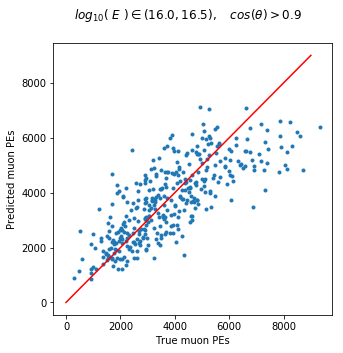

In [20]:
# plot predictions vs true values
fig2,ax2 = plt.subplots(1,1,figsize=(5,5))
ax2.scatter(y_test,predictions1,marker='.')
x = np.linspace(0,9000)
ax2.plot(x,x,color='r')
ax2.set_xlabel('True muon PEs')
ax2.set_ylabel('Predicted muon PEs')
fig2.suptitle(r'$log_{10}(\ E\ ) \in (16.0,16.5),\quad cos(\theta) > 0.9$')
plt.show()

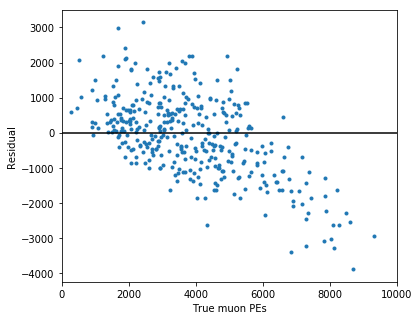

In [21]:
# Plot residuals
fig3,ax3=plt.subplots(1,1,figsize=(6,5))
residual = [predictions1[i]-y_test[i] for i in range(len(y_test))]
ax3.scatter(y_test,residual,marker='.')
x = np.linspace(0,10000)
ax3.plot(x,0*x,color='black')
ax3.set_xlim(0,10000)
ax3.set_ylabel('Residual')
ax3.set_xlabel('True muon PEs')
plt.show()

## Try another model

In [22]:
# create model
model2 = Sequential()
model2.add(Dense(10,input_dim=4,activation='relu'))
model2.add(Dense(10,activation='relu'))
model2.add(Dense(4,activation='relu'))
model2.add(Dense(1,activation=None))

In [23]:
# compile model
model2.compile(loss='msle',optimizer='adam',metrics=['mape','mse'])

In [24]:
# fit the model to the data
history2 = model2.fit(x_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
1096/1096 [==============================] - 1s 590us/step - loss: 64.2028 - mean_absolute_percentage_error: 99.9965 - mean_squared_error: 18583274.4872
Epoch 2/150
1096/1096 [==============================] - 0s 199us/step - loss: 52.6786 - mean_absolute_percentage_error: 99.9469 - mean_squared_error: 18570376.7637
Epoch 3/150
1096/1096 [==============================] - 0s 191us/step - loss: 38.5487 - mean_absolute_percentage_error: 99.7781 - mean_squared_error: 18527112.2226
Epoch 4/150
1096/1096 [==============================] - 0s 184us/step - loss: 29.2186 - mean_absolute_percentage_error: 99.4584 - mean_squared_error: 18445222.6150
Epoch 5/150
1096/1096 [==============================] - 0s 194us/step - loss: 23.1094 - mean_absolute_percentage_error: 99.0028 - mean_squared_error: 18321535.7372
Epoch 6/150
1096/1096 [==============================] - 0s 184us/step - loss: 18.9206 - mean_absolute_percentage_error: 98.3912 - mean_squared_error: 18163623.9726
Epoch 7/15

1096/1096 [==============================] - 0s 204us/step - loss: 0.2203 - mean_absolute_percentage_error: 41.0418 - mean_squared_error: 2397885.7348
Epoch 51/150
1096/1096 [==============================] - 0s 205us/step - loss: 0.2141 - mean_absolute_percentage_error: 40.6649 - mean_squared_error: 2317939.9877
Epoch 52/150
1096/1096 [==============================] - 0s 199us/step - loss: 0.2083 - mean_absolute_percentage_error: 40.3150 - mean_squared_error: 2250036.3201
Epoch 53/150
1096/1096 [==============================] - 0s 200us/step - loss: 0.2030 - mean_absolute_percentage_error: 39.9511 - mean_squared_error: 2187947.5821
Epoch 54/150
1096/1096 [==============================] - 0s 204us/step - loss: 0.1981 - mean_absolute_percentage_error: 39.5451 - mean_squared_error: 2135528.5156
Epoch 55/150
1096/1096 [==============================] - 0s 183us/step - loss: 0.1936 - mean_absolute_percentage_error: 39.1296 - mean_squared_error: 2086734.7014
Epoch 56/150
1096/1096 [=====

1096/1096 [==============================] - 0s 185us/step - loss: 0.1068 - mean_absolute_percentage_error: 26.9767 - mean_squared_error: 1414590.7103
Epoch 101/150
1096/1096 [==============================] - 0s 185us/step - loss: 0.1066 - mean_absolute_percentage_error: 26.7305 - mean_squared_error: 1422971.4663
Epoch 102/150
1096/1096 [==============================] - 0s 186us/step - loss: 0.1065 - mean_absolute_percentage_error: 26.8611 - mean_squared_error: 1416827.5039
Epoch 103/150
1096/1096 [==============================] - 0s 181us/step - loss: 0.1063 - mean_absolute_percentage_error: 26.7471 - mean_squared_error: 1419881.6179
Epoch 104/150
1096/1096 [==============================] - 0s 191us/step - loss: 0.1062 - mean_absolute_percentage_error: 26.7429 - mean_squared_error: 1417731.4611
Epoch 105/150
1096/1096 [==============================] - 0s 182us/step - loss: 0.1060 - mean_absolute_percentage_error: 26.7825 - mean_squared_error: 1413529.0157
Epoch 106/150
1096/1096 

1096/1096 [==============================] - 0s 193us/step - loss: 0.1034 - mean_absolute_percentage_error: 26.1395 - mean_squared_error: 1414525.3000
Epoch 150/150
1096/1096 [==============================] - 0s 182us/step - loss: 0.1034 - mean_absolute_percentage_error: 26.2705 - mean_squared_error: 1413005.0750


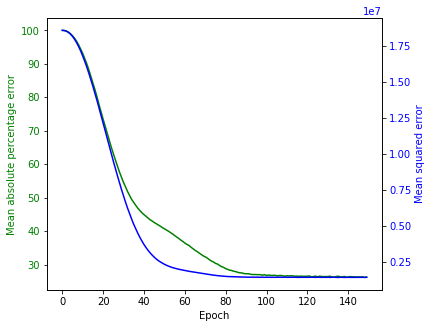

In [25]:
# plot the metrics vs epoch number

fig4,ax4 = plt.subplots(1,1,figsize=(6,5))
ax4.plot(history2.history['mean_absolute_percentage_error'],color='green')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Mean absolute percentage error',color='green')
ax4.tick_params(axis='y', labelcolor='green')

ax4_ = ax4.twinx()
ax4_.plot(history2.history['mean_squared_error'],color='blue')
ax4_.set_ylabel('Mean squared error',color='blue')
ax4_.tick_params(axis='y', labelcolor='blue')
plt.show()

#plt.plot(history2.history['mean_absolute_percentage_error'],color='green')
#plt.show()

In [26]:
# use the model to make predictions
predictions = model2.predict(x_test)

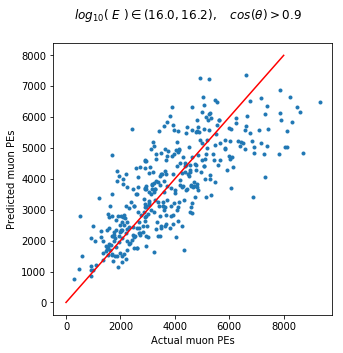

In [27]:
# plot predictions vs true values
fig2,ax2 = plt.subplots(1,1,figsize=(5,5))
ax2.scatter(y_test,predictions,marker='.')
xx = np.linspace(0,8000)
ax2.plot(xx,xx,color='r')
ax2.set_xlabel('Actual muon PEs')
ax2.set_ylabel('Predicted muon PEs')
fig2.suptitle(r'$log_{10}(\ E\ ) \in (16.0,16.2),\quad cos(\theta) > 0.9$')
plt.show()

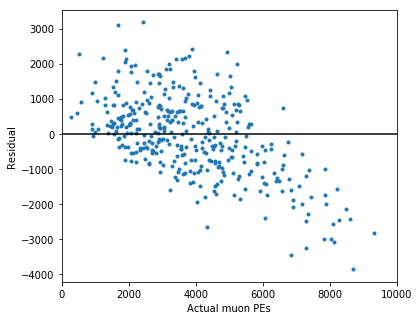

In [28]:
# Plot residuals
fig2_,ax2_=plt.subplots(1,1,figsize=(6,5))
temp = [predictions[i]-y_test[i] for i in range(len(y_test))]
ax2_.scatter(y_test,temp,marker='.')
xx = np.linspace(0,10000)
ax2_.plot(xx,0*xx,color='black')
ax2_.set_xlim(0,10000)
ax2_.set_ylabel('Residual')
ax2_.set_xlabel('Actual muon PEs')
plt.show()